<a href="https://colab.research.google.com/github/NSR9/EVA4/blob/master/S9/S9_mainfile2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing python dependencies
from __future__ import print_function
import numpy as np
import sys

#importing Pytorch packages
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR

# Importing torch summary
!pip install torchsummary
from torchsummary import summary

#importing albumentations for datatransformation\
!pip install albumentations


#Importing matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Importing google drive colab package to load files
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# add path to our library in default search path
sys.path.append('/content/drive/My Drive/S92')

In [4]:
#importing python modules
import ViewData
import Dataloaders1
import Albumentations
from Albumentations import albTransforms
import cifar10_models as models # drive
import resnet as rsnet
import execute # this is to train & test the model
import data_transform as dt#import data_transform


Files already downloaded and verified
Files already downloaded and verified


In [5]:
# trainloader and testloader defined and loaded
tl = dt.DataTransformandLoad()
channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
trainloader, testloader = tl.TransformAndLoad(mean1 = channel_means,stdev1 = channel_stdevs)




Files already downloaded and verified
Files already downloaded and verified


 deer   dog truck   dog


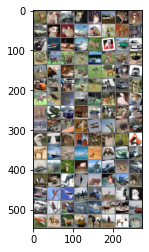

In [6]:
# let us view some training images
ViewData.getTrainImages()

In [7]:
# Model Summary

#using GPU 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#creating a model
model =  rsnet.ResNet18().to(device)
# View summary of the model
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1

In [8]:
#creating model1 to import test and train modules
model1 = execute.Test_Train()
incorrect_samples = []
#defining optimizer and scheduler
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=15)

#Running the Epochs
EPOCHS = 15
for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler)
  model1.test(model, device, testloader,incorrect_samples,"model.pt")

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.249704360961914 Batch_id=390 Accuracy=45.51: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0109).  Saving model ...

Test set: Average loss: 0.0109, Accuracy: 5369/10000 (53.69%)

EPOCH: 2


Loss=0.8055872917175293 Batch_id=390 Accuracy=63.41: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0109 --> 0.0071).  Saving model ...

Test set: Average loss: 0.0071, Accuracy: 6937/10000 (69.37%)

EPOCH: 3


Loss=0.6526218056678772 Batch_id=390 Accuracy=73.00: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0071 --> 0.0064).  Saving model ...

Test set: Average loss: 0.0064, Accuracy: 7305/10000 (73.05%)

EPOCH: 4


Loss=0.45626339316368103 Batch_id=390 Accuracy=78.37: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0064 --> 0.0053).  Saving model ...

Test set: Average loss: 0.0053, Accuracy: 7750/10000 (77.50%)

EPOCH: 5


Loss=0.4581221044063568 Batch_id=390 Accuracy=82.40: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0053 --> 0.0048).  Saving model ...

Test set: Average loss: 0.0048, Accuracy: 8025/10000 (80.25%)

EPOCH: 6


Loss=0.29069533944129944 Batch_id=390 Accuracy=84.97: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0048 --> 0.0042).  Saving model ...

Test set: Average loss: 0.0042, Accuracy: 8218/10000 (82.18%)

EPOCH: 7


Loss=0.2979642450809479 Batch_id=390 Accuracy=87.44: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8288/10000 (82.88%)

EPOCH: 8


Loss=0.28882113099098206 Batch_id=390 Accuracy=89.42: 100%|██████████| 391/391 [03:20<00:00,  1.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0042 --> 0.0040).  Saving model ...

Test set: Average loss: 0.0040, Accuracy: 8402/10000 (84.02%)

EPOCH: 9


Loss=0.4488004744052887 Batch_id=390 Accuracy=91.00: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8394/10000 (83.94%)

EPOCH: 10


Loss=0.2501581311225891 Batch_id=390 Accuracy=92.85: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0040 --> 0.0037).  Saving model ...

Test set: Average loss: 0.0037, Accuracy: 8561/10000 (85.61%)

EPOCH: 11


Loss=0.2493487298488617 Batch_id=390 Accuracy=94.55: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8573/10000 (85.73%)

EPOCH: 12


Loss=0.2963588237762451 Batch_id=390 Accuracy=96.28: 100%|██████████| 391/391 [03:22<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8749/10000 (87.49%)

EPOCH: 13


Loss=0.06454101949930191 Batch_id=390 Accuracy=97.65: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8800/10000 (88.00%)

EPOCH: 14


Loss=0.03408318758010864 Batch_id=390 Accuracy=98.58: 100%|██████████| 391/391 [03:20<00:00,  1.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8794/10000 (87.94%)

EPOCH: 15


Loss=0.0249533299356699 Batch_id=390 Accuracy=98.90: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]



Test set: Average loss: 0.0039, Accuracy: 8807/10000 (88.07%)



plane
dog
bird
truck
torch.Size([4, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


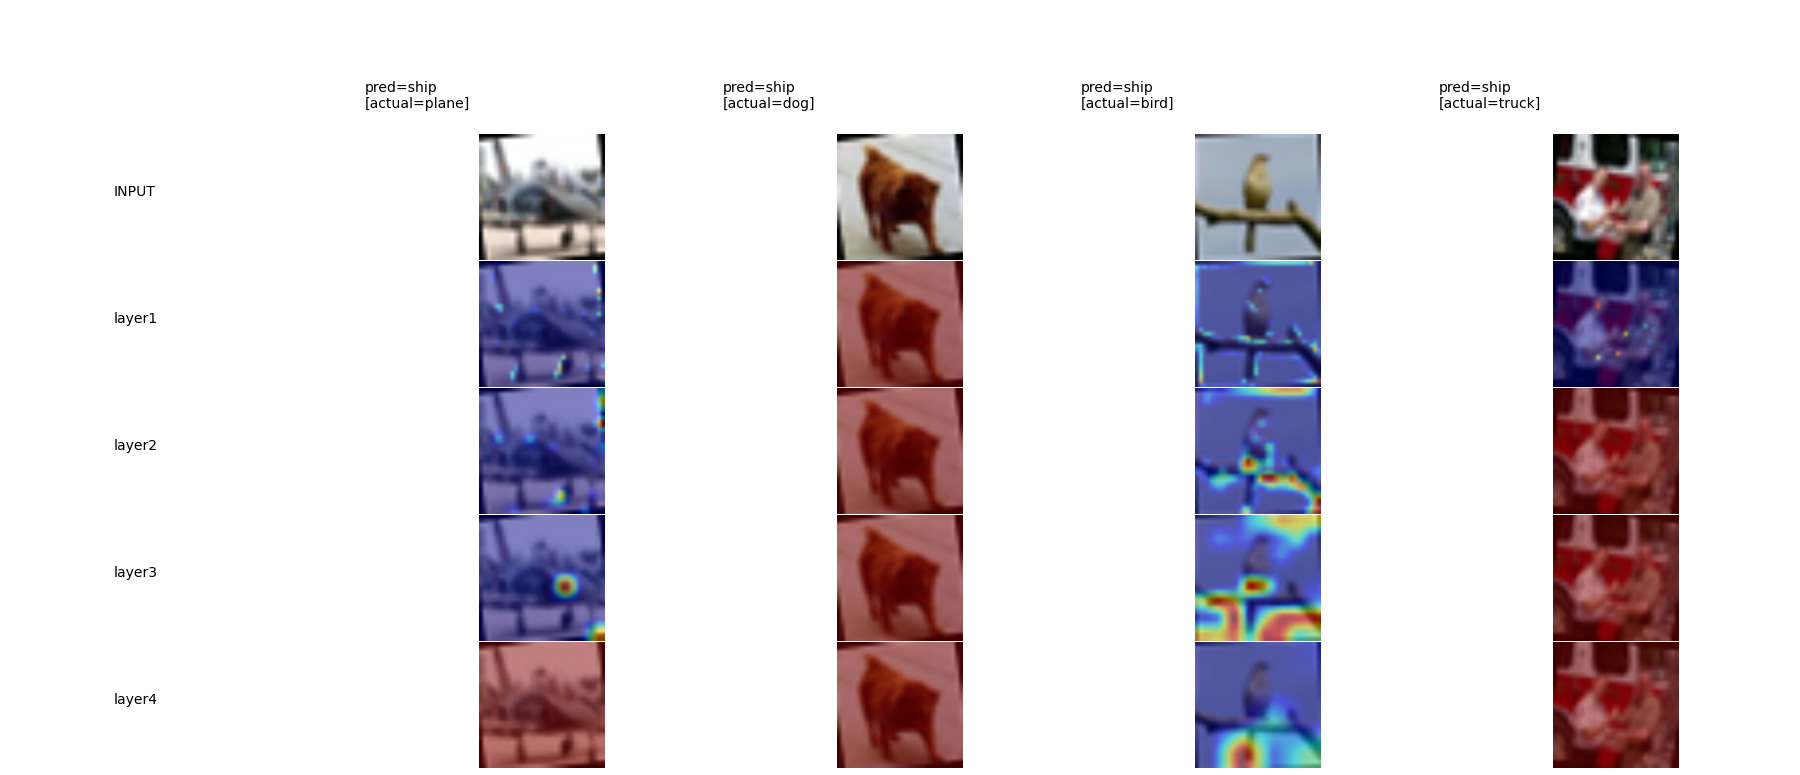

In [9]:
import GradCam
class_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
device = torch.device("cuda" if use_cuda else "cpu")
images = [x['image'] for x in incorrect_samples[:4]]
target_classes = [l['label'] for l in incorrect_samples[:4]]
# print(images)
def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i] # if not unnormalized then the resulting images will be dark and not visible
  return np.transpose(img, (1,2,0))
for i in target_classes:
  print(class_names[i])

model = rsnet.ResNet18().to(device)
image_size = (3,32,32)

target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = GradCam.GRADCAM(images, target_classes, model, target_layers)
GradCam.PLOT(gradcam_output, images, target_classes, target_layers, class_names, image_size, predicted_classes, unnormalize)
# plotGCAM(gcam_layers, images, labels, target_layers, class_names, image_size, predicted, unnormalize